<center><font face="Times New ROman" size="10" color="#000080">- RJS0019 -</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Importando os Dados -</font>

In [1]:
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
#-----------------------------------------------------#
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#-----------------------------------------------------#
name = 'RJS0019'

In [2]:
#------------------------------------------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('RJS0019.dat', dtype=float, count=-1, sep='	')

p  = len(data)/7 

print len(data),'- comprimento original, antes da divisao'
print p,'- comprimento de uma unica coluna'

data  = np.reshape(data, (len(data)/7,7))
#----------------------------------------As propriedades petrofisicas do poco--------------------------------------------#


prof = np.array(data[:,0],float) # profundidade em metros
DTP  = np.array(data[:,1],float) # DTp em us/ft
GR   = np.array(data[:,2],float) # GR em unidades API
ILD  = np.array(data[:,3],float) # ILD em Ohm.m
PHIN = np.array(data[:,4],float) # PHIN em %
RHOb = np.array(data[:,5],float) # RHOb em g/cm3

print
print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0])
print prof[162], prof[876], prof[1007]

9191 - comprimento original, antes da divisao
1313 - comprimento de uma unica coluna

(2950.0556000000001, 89.6892, 47.661900000000003, 1.6055999999999999, 25.596599999999999, 2.4167000000000001)
2974.7444 3083.558 3103.5224


In [3]:
#-------------------------------Litologia RJS0019-----------------------------------#
are = [0]*p
sil = [0]*p
mar = [0]*p
arg = [0]*p


for i in range (p):
    if prof[i] >= 2951 and prof[i] < 2963.7725:
        sil[i] = 70
    #------------------------------------------#
    if prof[i] >= 2963.7725 and prof[i] < 2965.2695:
        are[i] = 90
    if prof[i] >= 2967.9640 and prof[i] < 2969.7605:
        are[i] = 90
    if prof[i] >= 2971.2575 and prof[i] < 2973.0539:
        are[i] = 90
    if prof[i] >= 2975.1497 and prof[i] < 2994.6108:
        are[i] = 90
    if prof[i] >= 3001.4970 and prof[i] < 3003.5928:
        are[i] = 90
    if prof[i] >= 3006.5868 and prof[i] < 3008.3832:
        are[i] = 90
    if prof[i] >= 3009.5808 and prof[i] < 3013.1737:
        are[i] = 90
    if prof[i] >= 3014.9701 and prof[i] < 3018.8623:
        are[i] = 90
    if prof[i] >= 3020.6587 and prof[i] < 3022.4551:
        are[i] = 90
    if prof[i] >= 3034.7305 and prof[i] < 3037.4252:
        are[i] = 90
    if prof[i] >= 3057.4850 and prof[i] < 3081.1377:
        are[i] = 90
    if prof[i] >= 3085.0299 and prof[i] < 3087.1257:
        are[i] = 90
    if prof[i] >= 3098.000 and prof[i] < 3103.000:
        are[i] = 90
    if prof[i] >= 3107.000 and prof[i] < 3110.1796:
        are[i] = 90
    #------------------------------------------#
    if prof[i] >= 2973.0539 and prof[i] < 2975.1497:
        arg[i] = 50
    if prof[i] >= 3003.5928 and prof[i] < 3006.5868:
        arg[i] = 50
    if prof[i] >= 3008.3832 and prof[i] < 3009.5808:
        arg[i] = 50
    if prof[i] >= 3013.1737 and prof[i] < 3014.9701:
        arg[i] = 50
    if prof[i] >= 3018.8623 and prof[i] < 3020.6587:
        arg[i] = 50
    if prof[i] >= 3050.0000 and prof[i] < 3057.4850:
        arg[i] = 50
    #------------------------------------------#
    if prof[i] >= 2965.2695 and prof[i] < 2967.9640:
        mar[i] = 60
    if prof[i] >= 2969.7605 and prof[i] < 2971.2575:
        mar[i] = 60
    if prof[i] >= 2994.6108 and prof[i] < 3001.4970:
        mar[i] = 60
    if prof[i] >= 3022.4551 and prof[i] < 3034.7305:
        mar[i] = 60
    if prof[i] >= 3037.4252 and prof[i] < 3050.0000:
        mar[i] = 60
    if prof[i] >= 3081.1377 and prof[i] < 3085.0299:
        mar[i] = 60
    if prof[i] >= 3087.1257 and prof[i] < 3098.0000:
        mar[i] = 60
    if prof[i] >= 3103.0000 and prof[i] < 3107.0000:
        mar[i] = 60

#-----------------------------------------------------Granulometria------------------------------------------------------#
arem = [1e-6]*p #are - Areia media
silt = [1e-6]*p #sil - silte
shal = [1e-6]*p #arg - Argila

calu = [1e-6]*p # mar - Calcilutito

grain = [1e-6]*p # litologia

for i in range(p):
    if are[i] == 90:
        arem[i] = 0.375
        grain[i]= 0.375
    if sil[i] == 70:
        silt[i] = 0.033
        grain[i]= 0.033
    if arg[i] == 50:
        shal[i] = 0.016
        grain[i]= 0.016
    if mar[i] == 60:
        calu[i] = 0.002
        grain[i]= 0.002

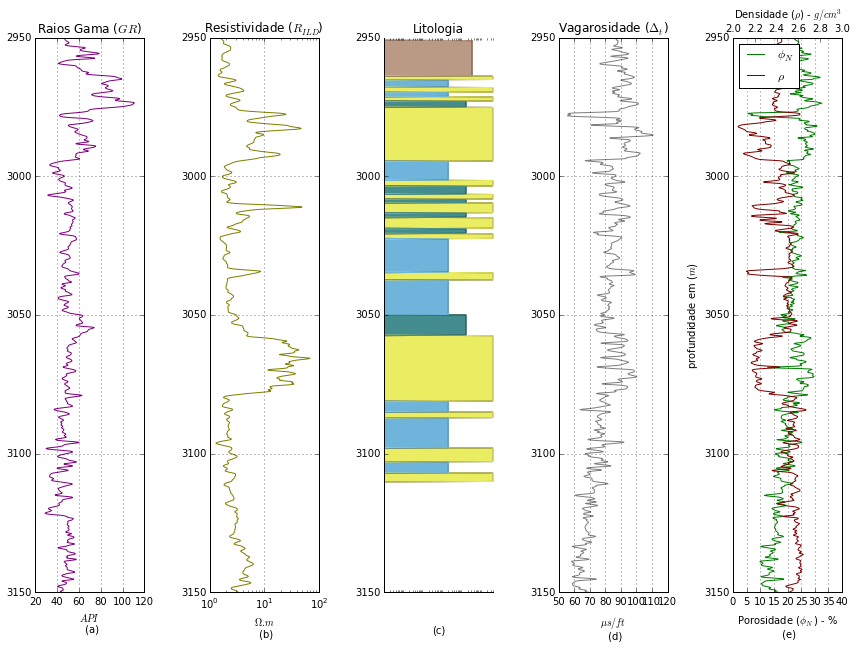

In [4]:
#--------------------------------------------------------Graficos--------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$')
ax1.set_title(u'Raios Gama ($GR$)')

ax1.set_xlabel('$API$ \n (a)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.invert_yaxis()
ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61')
ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e')
ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')


ax3.fill_betweenx(prof, arem, facecolor='#eaec61')
ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e')
ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')


ax3.set_title('Litologia')                       
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.4,xmin=0)

ax3.invert_yaxis()

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax3.yaxis.set_ticks_position('left')
ax3.axes.get_xaxis().set_ticks([])

ax3.set_xlabel('(c)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$')
ax4.set_title('Vagarosidade ($\Delta _t$)')                      
ax4.set_xlabel('$\mu s / ft$ \n (d)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.invert_yaxis()
ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)')                    
ax5.set_ylabel('profundidade em ($m$)')
ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
labf = lab5+lab0
labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=2)
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0)
ax5.set_xlim(xmax=40.0,xmin=0.0)
ax5.invert_yaxis()
ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Argilosidade -</font>

In [5]:
#-------------------------------Raio Gamma-----------------------------------#

IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i # determina a posicao do valor maximo do Gama Ray no perfil
        
print locmin,'posicao do GR min |',min(GR),'valor do GR min'
print locmax,'posicao do GR min |',max(GR),'valor do GR max'

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print
print mean(IGR),' media (IGR) - indice de raio gama'
print mean(VSH),' media (VSH) - quantidade de folhelho '

1125 posicao do GR min | 29.0205 valor do GR min
154 posicao do GR min | 110.7217 valor do GR max

0.293729489772  media (IGR) - indice de raio gama
0.112326600336  media (VSH) - quantidade de folhelho 


<br><center><font face="Times New ROman" size="6" color="#000000">- Porosidades -</font>

In [6]:
#--------------------------------------------------Porosidade Total------------------------------------------------------#
RHOf  = 1.101 # g/cm3 para a agua salgada
DTPf = 189.0 # us/feet para agua salgada


RHOma = [2.65]*p
DTPma = [55.5]*p

for i in range (p):
    if mar[i] == 60:
        DTPma[i] = 66.6
        RHOma[i] = 2.68
    if arg[i] == 50:
        DTPma[i] = 85.0
        RHOma[i] = 2.56
    if sil[i] == 70:
        DTPma[i] = 70.3
        RHOma[i] = 2.60

RHOma  = [2.65]*p # g/cm3 para o quartzo
DTPma = [55.5]*p # us/feet para o quartzo

#print RHOma, 'RHOma da matriz  |',RHOf,'RHOf do filtrado de lama'
#print DTPma,'dtma da matriz |',DTPf,'DTPf do filtrado de lama'
#------------------------------------------------------------------------------------------------#
PHItd = [] # Porosidade total - perfil densidade

for i in range (p):
    PHItd.append(100*(RHOb[i] - RHOma[i])/(RHOf - RHOma[i]))       # Porosidade total - perfil densidade

print
print mean(PHItd),' media (PHItd) - porosidade total pelo perfil densidade em %'
#------------------------------------------------------------------------------------------------#
PHIsh = [] # Porosidade aparente - folhelho

for i in range (p):
    PHIsh.append(PHIN[i] - PHItd[i])
    
print
print mean(PHIsh),' media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %'
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):
        Psh = i
        
print Psh,' ponto de folhelho (Psh)'

RHOsh = RHOb[Psh]

print
print RHOsh, 'densidade do folhelho (RHOsh)'
print '------------------------------------'
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIe = []
for i in range (p):
    PHIe.append((((RHOb[i] - RHOma[i])/(RHOf - RHOma[i])) - ((VSH[i])*(RHOsh - RHOma[i])/(RHOf - RHOma[i])))*100)
    
print mean(PHIe),' media (PHIe) -  porosidade efetiva densidade'
#-----------------------------------------Porosidade Sonica--------------------------------------------------
PHIts = []
PHIes = []
gas   = []

DTPsh = DTP[Psh]
for i in range (p):
    
    PHIts.append(((DTP[i] - DTPma[i])/(DTPf - DTPma[i]))*100.0)    # Porosidade total - perfil sonico
    PHIes.append((((((DTP[i] - DTPma[i])/(DTPf - DTPma[i]))) - ((VSH[i])*(DTPsh - DTPma[i])/(DTPf - DTPma[i]))))*100.00)
    
print mean(PHIes),' media (PHIe) -  porosidade efetiva sonico'


13.0744400854  media (PHItd) - porosidade total pelo perfil densidade em %

8.26374731748  media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %
465  ponto de folhelho (Psh)

2.59 densidade do folhelho (RHOsh)
------------------------------------
12.6393467336  media (PHIe) -  porosidade efetiva densidade
17.5301975902  media (PHIe) -  porosidade efetiva sonico


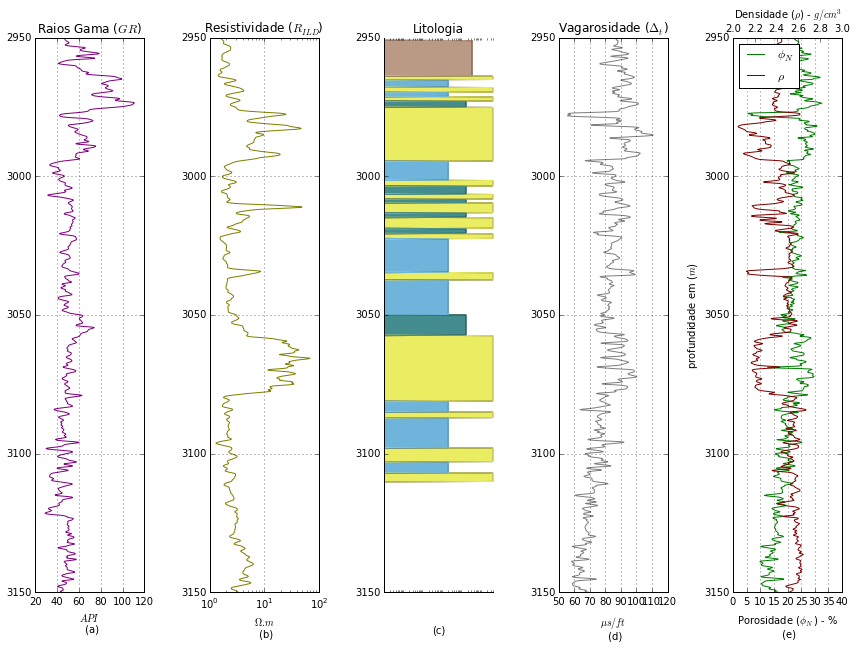

In [7]:
#--------------------------------------------------------Graficos--------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$')
ax1.set_title(u'Raios Gama ($GR$)')

ax1.set_xlabel('$API$ \n (a)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()

#ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)')

ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.invert_yaxis()
ax2.grid()

#ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61')
ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e')
ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')

ax3.fill_betweenx(prof, arem, facecolor='#eaec61')
ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e')
ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')

ax3.set_title('Litologia')                       
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.4,xmin=0)

ax3.invert_yaxis()

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

ax3.yaxis.set_ticks_position('left')
ax3.axes.get_xaxis().set_ticks([])

ax3.set_xlabel('(c)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$')


ax4.set_title('Vagarosidade ($\Delta _t$)')                      
ax4.set_xlabel('$\mu s / ft$ \n (d)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.invert_yaxis()
ax4.grid()

#ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#

lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
#lab2 = ax1.plot(PHItd,prof,'-m',linewidth = 1,label='$\phi_{t,D}$')


ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)')                    
ax5.set_ylabel('profundidade em ($m$)')

ax0 = ax5.twiny()

lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')

labf = lab5+lab0#+lab2

labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=2)

ax5.set_ylim(ymax=max(prof),ymin=min(prof))

ax0.set_xlim(xmax=3.0,xmin=2.0)
ax5.set_xlim(xmax=40.0,xmin=0.0)

ax5.invert_yaxis()
ax5.grid()
#--------------------------------------------------------------------------------------------------#


plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético (teste) -</font>

$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.63 − 9.82 \phi_{e,D} − 2.25 V_{sh} + 0.08 R_{ILD} + 4.06 (\phi_{e,D}. V_{sh}) −0.22 (\phi_{e,D} . R_{ILD}) + 1.92 × 10^{−3} (V_{sh} . R_{ILD}) + 17.18 \phi_{e,D}^2 + 1.26 V_{sh}^2 − 2.66 × 10^{−4} R_{ILD}^2 $ - Augusto

 0.803345563704 para o sonico e para VP 0.794364706795  - Siqueira - coeficiente de correlacao
0.861142002562 para o sonico e para VP 0.859275514681  - Augusto - coeficiente de correlacao
0.312766921989 para o sonico e para VP2
0.861142002562 para o sonico e para VP 0.859275514681  - Augusto - coeficiente de correlacao
0.312766921989 para o sonico e para VP2 0.760604028247  - Augusto - coeficiente de correlacao

para VP no NA-02 0.725157778867  - Augusto 02 - coeficiente de correlacao
para VP no NA-07 0.791284548732  - Augusto 07 - coeficiente de correlacao
para VP no NA-12 0.79900944944  - Augusto 12 - coeficiente de correlacao
para VP no NA-37 0.737346103628  - Augusto 37 - coeficiente de correlacao


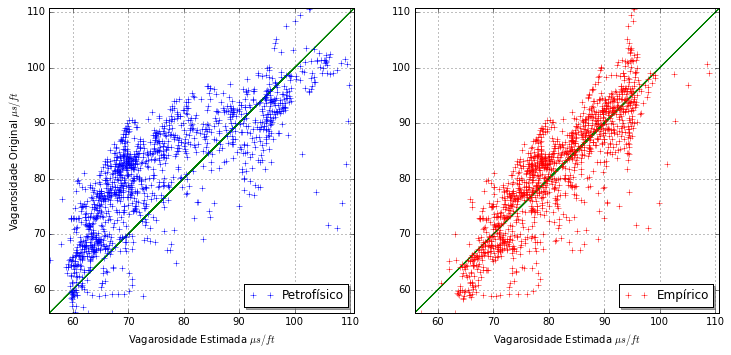

ValueError: x and y must have same first dimension

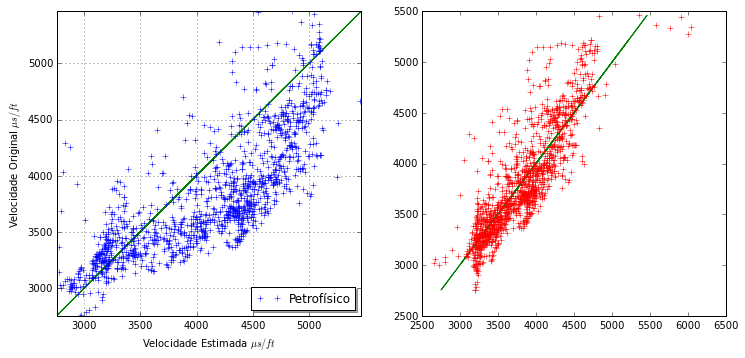

In [37]:
#-------------------------------------------------------Estimando VP-----------------------------------------------------#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
#---------------------------------------------------------------
siq = "- Siqueira"; aug = "- Augusto"

siqp = name+siq
augp = name+aug

PHIs = max(PHIsh) #Usar essa porosidade aqui para estimar
#----------------------------------------------------Modelo Petrofisico--------------------------------------------------#

DTPs = []

for i in range (p):
    DTPs.append(DTPma[i] + (DTPf - DTPma[i])*((PHItd[i]/100.0) + (VSH[i]*(PHIs/100.0)))) # Sonico (Siqueira & Martins)

VPs=[] # velocidade de onda P (Siqueira e Martins)
for i in range(p):
    VPs.append(1.0000/(cfvp*DTPs[i]))
    
#---------------------------------------#

corrS1 = np.corrcoef(DTP,DTPs)
corrS2 = np.corrcoef(VP,VPs)

print corrS1[0,1],'para o sonico e para VP',corrS2[0,1]," - Siqueira - coeficiente de correlacao"  

#------------------------------------------------------Modelo Empirico---------------------------------------------------#

VPa  = [] # Vp de augusto
VPa2 = [] # Vp de augusto 2

VPa_02 = []
VPa_07 = []
VPa_12 = []
VPa_37 = []

cfvp0 = 3.2808*(10**(-6)) # fator de conversao 

for i in range (p): # determinando VPa em ms
    VPa.append(4.63 - (9.82*PHIe[i]/100) - (2.25*VSH[i]) + (0.08*ILD[i]) + (4.06*(PHIe[i]/100)*VSH[i]) 
    - (0.22*(PHIe[i]/100)*ILD[i]) + (0.00192*(VSH[i])*ILD[i]) + (17.18*((PHIe[i]/100)**2))
    + (1.26*((VSH[i])**2)) - (0.000266*((ILD[i])**2)) )
    
    VPa2.append(4.47 -(4.01*PHIe[i]/100.0) - (1.20*VSH[i]))
    
    VPa2.append(4.43 -(4.05*PHIe[i]/100.0) - (1.38*VSH[i]) + (2.40*(ILD[i])*10**(-3)))
    
    VPa_02.append(4.29 - (2.66*PHIe[i]/100.0) - (1.78*VSH[i]) - (5.38*ILD[i]*(10**(-5))))
    
    VPa_07.append(4.84 - (8.43*PHIe[i]/100.0) - (5.52*VSH[i]) + (18.78*(PHIe[i]/100.0)*VSH[i]) 
    + (8.94*((PHIe[i]/100)**2)) + (2.25*VSH[i]**2))
    
    VPa_12.append(4.28 - (5.63*PHIe[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIe[i]/100.0)*VSH[i]) 
    + 6.76*(PHIe[i]/100.0)**2 + (0.85*(VSH[i])**2))
    
    VPa_37.append(3.90 - (5.07*PHIe[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2))))
    
DTPa  = []
DTPa2 = []
for i in range(p):
    VPa[i]  = VPa[i]*1000.000
    VPa2[i] = VPa2[i]*1000.000
    DTPa.append(1.0000/(cfvp0*VPa[i]))
    DTPa2.append(1.0000/(cfvp0*VPa2[i]))

#--------------------------------------#

corrA1 = np.corrcoef(DTP,DTPa)
corrA2 = np.corrcoef(VP,VPa)
corrA3 = np.corrcoef(DTP,DTPa2)
#corrA4 = np.corrcoef(VP,VPa2)

print corrA1[0,1],'para o sonico e para VP',corrA2[0,1]," - Augusto - coeficiente de correlacao"
print corrA3[0,1],'para o sonico e para VP2'#,corrA4[0,1]," - Augusto - coeficiente de correlacao"

corr_na02 = np.corrcoef(VP,VPa_02)
corr_na07 = np.corrcoef(VP,VPa_07)
corr_na12 = np.corrcoef(VP,VPa_12)
corr_na37 = np.corrcoef(VP,VPa_37)

print corrA1[0,1],'para o sonico e para VP',corrA2[0,1]," - Augusto - coeficiente de correlacao"
print corrA3[0,1],'para o sonico e para VP2',corrA4[0,1]," - Augusto - coeficiente de correlacao"
print
print 'para VP no NA-02',corr_na02[0,1]," - Augusto 02 - coeficiente de correlacao"
print 'para VP no NA-07',corr_na07[0,1]," - Augusto 07 - coeficiente de correlacao"
print 'para VP no NA-12',corr_na12[0,1]," - Augusto 12 - coeficiente de correlacao"
print 'para VP no NA-37',corr_na37[0,1]," - Augusto 37 - coeficiente de correlacao"


#--------------------------------------------------diferenca velocidades-------------------------------------------------#

difVPVPa = [] # Diferenca absoluta VP - VPa
difVPVPs = [] # Diferenca absoluta VP - VPs

relVPVPa = [] # Diferenca relativa VP - VPa
relVPVPs = [] # Diferenca relativa VP - VPs

for i in range (p):
    difVPVPa.append(np.sqrt((VPa[i] - VP[i])**2))
    difVPVPs.append(np.sqrt((VPs[i] - VP[i])**2))
    
    relVPVPa.append(100.0*np.sqrt((((VP[i] - VPa[i])/VP[i]))**2))
    relVPVPs.append(100.0*np.sqrt((((VP[i] - VPs[i])/VP[i]))**2))
    
#------------------------------------------------------------------------------------------------------------------------#
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.plot(DTP,DTP,'-g')
ax1.plot(DTPs,DTP,'+b',label=u'Petrofísico')
legend = ax1.legend(loc=4, shadow=True)
plt.xlim(xmax=max(DTP),xmin=min(DTP))
plt.ylim(ymax=max(DTP),ymin=min(DTP))
plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.ylabel('Vagarosidade Original $\mu s / ft$')
plt.grid()

#------------------------------------------------#

ax2 = plt.subplot(222)
ax2.plot(DTP,DTP,'-g')
ax2.plot(DTPa,DTP,'+r',label=u'Empírico')
legend = ax2.legend(loc=4, shadow=True)

plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.xlim(xmax=max(DTP),xmin=min(DTP))
plt.ylim(ymax=max(DTP),ymin=min(DTP))
plt.grid()

plt.show()
#------------------------------------------------------------------------------------------------------------------------#
    
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.plot(VP,VP,'-g')
ax1.plot(VPs,VP,'+b',label=u'Petrofísico')
legend = ax1.legend(loc=4, shadow=True)
plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=max(VP),ymin=min(VP))
plt.xlabel('Velocidade Estimada $\mu s / ft$')
plt.ylabel('Velocidade Original $\mu s / ft$')
plt.grid()

#------------------------------------------------#

ax2 = plt.subplot(222)
ax2.plot(VP,VP,'-g')
ax2.plot(VPa, VP,'+r',label=u'Empírico1')
ax2.plot(VPa2,VP,'+g',label=u'Empírico2')
legend = ax2.legend(loc=4, shadow=True)

plt.xlabel('Velocidade Estimada $\mu s / ft$')
plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=max(VP),ymin=min(VP))
plt.grid()

plt.show()
name2 = '../../mario_tese/Figs/pocos/na'+name+'scatterplot.png'

fig.savefig(name2, dpi=100, transparent=True, bbox_inches='tight')

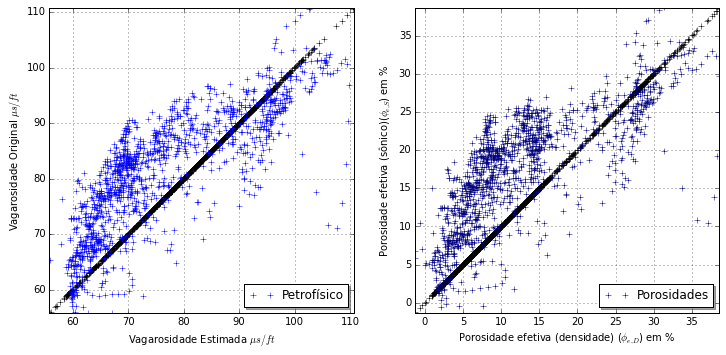

In [9]:
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.plot(DTP,DTP,'+k')
ax1.plot(DTPs,DTP,'+b',label=u'Petrofísico')
legend = ax1.legend(loc=4, shadow=True)
plt.xlim(xmax=max(DTP),xmin=min(DTP))
plt.ylim(ymax=max(DTP),ymin=min(DTP))
plt.xlabel('Vagarosidade Estimada $\mu s / ft$')
plt.ylabel('Vagarosidade Original $\mu s / ft$')
plt.grid()

#------------------------------------------------#

ax2 = plt.subplot(222)
ax2.plot(PHIe,PHIe,'+k')
ax2.plot(PHIe, PHIes,'+',label=u'Porosidades',color='navy')
legend = ax2.legend(loc=4, shadow=True)

plt.xlabel(u'Porosidade efetiva (densidade) ($\phi_{e,D}$) em %')
plt.ylabel(u'Porosidade efetiva (sônico)($\phi_{e,S}$) em %')
plt.xlim(xmax=max(PHIe),xmin=min(PHIe))
plt.ylim(ymax=max(PHIe),ymin=min(PHIe))
plt.grid()

plt.show()
name2 = '../../mario_tese/Figs/pocos/na'+name+'scatterplot.png'

fig.savefig(name2, dpi=100, transparent=True, bbox_inches='tight')

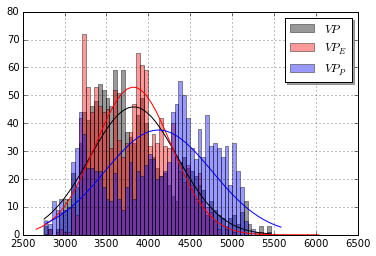

In [10]:
bins_s  = 60
bins_vp = np.linspace(min(VP), max(VP), bins_s)
#----------------------------------------------------------------------------#

plt.figure(1)
# VP
plt.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.4,label='$VP$')
result_0 = np.histogram(VP ,bins=bins_vp)
dx_0 = result_0[1][1] - result_0[1][0]

plt.plot(np.linspace(min(VP), max(VP),bins_s), mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),
                                                             np.sqrt(np.var(VP)))*len(VP)*dx_0, color='k')
#----------------------------------------------------------------------------#
#VP
plt.hist(VPa, bins_vp, histtype='bar', stacked=True, color='r', alpha=0.4,label='$VP_E$')
result_1 = np.histogram(VPa ,bins=bins_vp)
dx_1 = result_1[1][1] - result_1[1][0]

plt.plot(np.linspace(min(VPa), max(VPa),bins_s), mlab.normpdf(np.linspace(min(VPa),max(VPa),bins_s),np.mean(VPa),
                                                               np.sqrt(np.var(VPa)))*len(VPa)*dx_1, color='r')
#----------------------------------------------------------------------------#
# VP

plt.hist(VPs, bins_vp, histtype='bar', stacked=True, color='b', alpha=0.4,label='$VP_P$')
result_2 = np.histogram(VPs ,bins=bins_vp)
dx_2 = result_2[1][1] - result_2[1][0]

plt.plot(np.linspace(min(VPs), max(VPs),bins_s), mlab.normpdf(np.linspace(min(VPs),max(VPs),bins_s),np.mean(VPs),
                                                               np.sqrt(np.var(VPs)))*len(VPs)*dx_2, color='b')
#----------------------------------------------------------------------------#
legend = plt.legend(loc=1, shadow=True)
plt.grid()
plt.show()

In [11]:
range_teste = 10
DTPmaR = np.linspace(40.000,90.000,range_teste)
RHOmaR = np.linspace(1.0,3.000,range_teste)

VPs2 = []
dif2 = []
VPo  = []

DTPma_values = []
RHOma_values = []

for k in range (len(DTPmaR)):
    for j in range (len(RHOmaR)):
        for i in range (len(VP)):
            
            VPs2.append(1.0000/(cfvp*(DTPmaR[k] + (DTPf - DTPmaR[k])*(((((RHOb[i] - RHOmaR[j])/(RHOf - RHOmaR[j])) 
            - ((VSH[i])*(RHOsh - RHOmaR[j])/(RHOf - RHOmaR[j])))) + (VSH[i]*(PHIs/100.0))))))
            
            dif2.append(np.sqrt(((1.0000/(cfvp*(DTPmaR[k] + (DTPf - DTPmaR[k])*(((((RHOb[i] - RHOmaR[j])/(RHOf 
            - RHOmaR[j])) - ((VSH[i])*(RHOsh - RHOmaR[j])/(RHOf - RHOmaR[j])))) + (VSH[i]*(PHIs/100.0)))))) - VP[i])**2))
            DTPma_values.append(DTPmaR[k])
            RHOma_values.append(RHOmaR[j])
            
            VPo.append(VP[i])

print len(dif2)

dif3 = np.reshape(dif2,(range_teste**2,p))
VPs3 = np.reshape(VPs2,(range_teste**2,p))
VPo2 = np.reshape(VPo, (range_teste**2,p))

RHOma_final_A = np.reshape(RHOma_values,(range_teste**2,p))
DTPma_final_A = np.reshape(DTPma_values,(range_teste**2,p))

middif = []
corval = []

for i in range (range_teste**2):
    middif.append(np.mean(dif3[i,:]))
    corval.append(np.corrcoef(VPs3[i,:],VPo2[i,:])[0,1])

print
#print middif
print np.min(middif),'media diferenca'
print
#print corval
print np.max(corval),'coeficiente de correlacao'
print

for i in range (len(middif)):
    if middif[i] == min(middif):
        point_blue  = i
    if corval[i] == max(corval):
        point_black = i
        
print RHOma_final_A[point_blue,:][0],'RHOma minima media erro'
print DTPma_final_A[point_blue,:][0],'DTPma minima media erro'
print
print RHOma_final_A[point_black,:][0],'RHOma maximo coeficiente de correlacao'
print DTPma_final_A[point_black,:][0],'DTPma maximo coeficiente de correlacao'

131300

270.125150277 media diferenca

0.815792199693 coeficiente de correlacao

2.77777777778 RHOma minima media erro
56.6666666667 DTPma minima media erro

2.33333333333 RHOma maximo coeficiente de correlacao
51.1111111111 DTPma maximo coeficiente de correlacao


para o sonico e para VP 0.815620661209  - Siqueira - coeficiente de correlacao


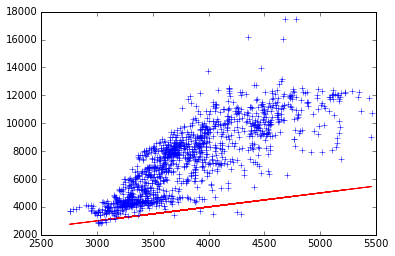

In [12]:
VPs4=[] # velocidade de onda P (Siqueira e Martins)

VVVV = 56.6
RRRR = 2.3

for i in range(p):
    VPs4.append(1.0000/(cfvp*(VVVV + (DTPf - VVVV)*(((((RHOb[i] - RRRR)/(RHOf - RRRR)) 
            - ((VSH[i])*(RHOsh - RRRR)/(RHOf - RRRR)))) + (VSH[i]*(PHIs/100.0))))))
    
#---------------------------------------#

corrS20 = np.corrcoef(VP,VPs4)

print 'para o sonico e para VP',corrS20[0,1]," - Siqueira - coeficiente de correlacao"  

#------------------------------------------------------Modelo Empirico---------------------------------------------------#
plt.plot(VP,VP,'-r')
plt.plot(VP,VPs4,'+b')
plt.show()

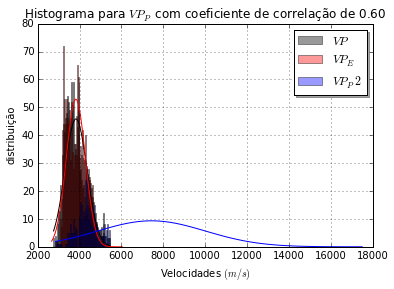

In [13]:
bins_s  = 60
bins_vp = np.linspace(min(VP), max(VP), bins_s)
#----------------------------------------------------------------------------#

plt.figure(1)
# VP
plt.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.4,label='$VP$')
result_0 = np.histogram(VP ,bins=bins_vp)
dx_0 = result_0[1][1] - result_0[1][0]

plt.plot(np.linspace(min(VP), max(VP),bins_s), mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),
                                                             np.sqrt(np.var(VP)))*len(VP)*dx_0, color='k')
#----------------------------------------------------------------------------#
#VP
plt.hist(VPa, bins_vp, histtype='bar', stacked=True, color='r', alpha=0.4,label='$VP_E$')
result_1 = np.histogram(VPa ,bins=bins_vp)
dx_1 = result_1[1][1] - result_1[1][0]

plt.plot(np.linspace(min(VPa), max(VPa),bins_s), mlab.normpdf(np.linspace(min(VPa),max(VPa),bins_s),np.mean(VPa),
                                                               np.sqrt(np.var(VPa)))*len(VPa)*dx_1, color='r')
#----------------------------------------------------------------------------#
# VP

plt.hist(VPs4, bins_vp, histtype='bar', stacked=True, color='b', alpha=0.4,label='$VP_P2$')
result_2 = np.histogram(VPs4 ,bins=bins_vp)
dx_2 = result_2[1][1] - result_2[1][0]

plt.plot(np.linspace(min(VPs4), max(VPs4),bins_s), mlab.normpdf(np.linspace(min(VPs4),max(VPs4),bins_s),np.mean(VPs4),
                                                               np.sqrt(np.var(VPs4)))*len(VPs4)*dx_2, color='b')
#----------------------------------------------------------------------------#
plt.title(u'Histograma para $VP_P$ com coeficiente de correlação de 0.60')
plt.xlabel('Velocidades $(m / s)$')
plt.ylabel(u'distribuição')
legend = plt.legend(loc=1, shadow=True)
plt.grid()
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Impedância Acústica -</font>

In [14]:
#---------------------Impedancia---(transformado de pe pra m)----------------------------
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)

cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
    
VPs=[] # velocidade de onda P (Siqueira e Martins)
for i in range(p):
    VPs.append(1.0000/(cfvp*DTPs[i]))
    
#------------------------------------------Impedancia Acustica-----------------------------------#


z_imp = [] # Impedancia acustica (m/s).(g/cm3)
Z     = [] # Impedancia acustica (Km/s).(g/cm3)

z_imp_a = [] # Impedancia acustica Augusto  (m/s).(g/cm3)
z_imp_s = [] # Impedancia acustica Siqueira (m/s).(g/cm3)

Za = [] # Impedancia acustica Augusto (Km/s).(g/cm3)
Zs = [] # Impedancia acustica Siqueira(Km/s).(g/cm3)

for i in range (p):
    z_imp0 = (RHOsi[i]*VP[i]) # de olho no RHOsi e RHOb
    z_imp.append(z_imp0)
    Z.append(z_imp0*1000.000)
    
    z_imp0a = (RHOsi[i]*VPa[i]) # de olho no RHOsi e RHOb
    z_imp_a.append(z_imp0a)
    Za.append(z_imp0a*1000.000)
    
    z_imp0s = (RHOsi[i]*VPs[i]) # de olho no RHOsi e RHOb
    z_imp_s.append(z_imp0s)
    Zs.append(z_imp0s*1000.000)
    
#--------------------------------------------------------------------------------------------------------#  

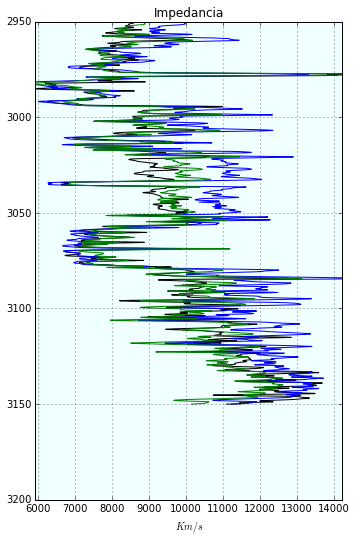

In [15]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (40,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax9.plot(Z,prof,'-k',linewidth = 1)
ax9.plot(Zs,prof,'-b',linewidth = 1)
ax9.plot(Za,prof,'-g',linewidth = 1)
ax9.set_title('Impedancia')
ax9.set_xlabel('$Km/s$')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(Z),xmin=min(Z))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Refletividade -</font>

In [16]:
#--------------------------------Refletividades---------------------

R  = [] # Refletividade
Rs = [] # Refletividade Siqueira
Ra = [] # Refletividade Augusto

for i in range (p):
    if i == 0:
        RR = 0
        RRs= 0
        RRa= 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
        RRs= (z_imp_s[i-1] - z_imp_s[i])/(z_imp_s[i-1] + z_imp_s[i])
        RRa= (z_imp_a[i-1] - z_imp_a[i])/(z_imp_a[i-1] + z_imp_a[i])
    R.append(RR)
    Rs.append(RRs)
    Ra.append(RRa)
    
zero_bar = [0]*p

print VPa[10]
print VPs[10]
print VP [10]

3613.54434785
4051.35963447
3456.27890304


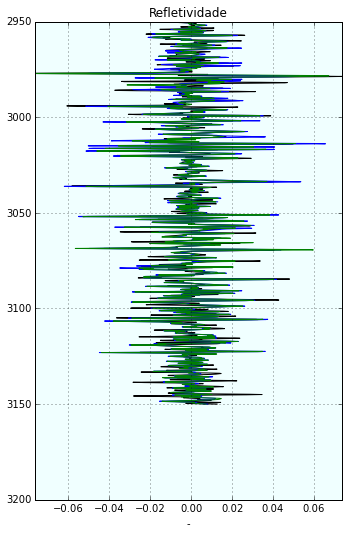

In [17]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (40,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax9.plot(R,prof,'-k',linewidth = 1)
ax9.plot(Rs,prof,'-b',linewidth = 1)
ax9.plot(Ra,prof,'-g',linewidth = 1)
ax9.set_title('Refletividade')
ax9.set_xlabel('-')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(R),xmin=min(R))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Tempo -</font>

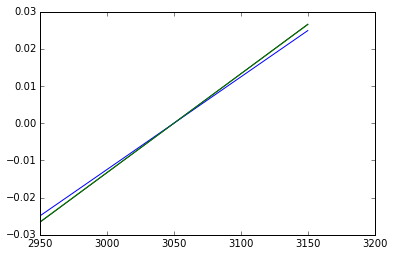

0.1524
3825.98370346
4.05448345393e-05
8.10896690785e-05


In [18]:
#---------------------------------------------time c(t)-----------------------------#
DL = prof[3]-prof[2]# valor do intervalo em m

T  = [] #tempo por intervalo padrao
Ts = [] #tempo por intervalo Siqueira
Ta = [] #tempo por intervalo Augusto 

for i in range (p):
    T.append(DL/VP[i])
    Ts.append(DL/VPs[i])
    Ta.append(DL/VPa[i])
    
#---------------------------------------------time c(t)-----------------------------#

# de 1313 elementos, o elemento 657 e central. No pyton, esse elemento e o 656

mp  = (p-1)/2 # termo central

dtf = [0.0]*mp
dtb = [0.0]*mp

dtfs = [0.0]*mp
dtbs = [0.0]*mp

dtfa = [0.0]*mp
dtba = [0.0]*mp

#----------------------------------------------------#

for i in range (mp):
    dtf[i] = np.mean(T)
    dtb[i] = -(np.mean(T))
    
    dtfs[i] = np.mean(Ts)
    dtbs[i] = -(np.mean(Ts))
    
    dtfa[i] = np.mean(Ta)
    dtba[i] = -(np.mean(Ta))
    
for i in range (1,mp):
    dtf[i]  = dtf[i- 1] + dtf[i]
    dtfs[i] = dtfs[i-1] + dtfs[i]
    dtfa[i] = dtfa[i-1] + dtfa[i]
    
for i in range (1,mp):
    dtb[i]  = dtb[i -1] + dtb[i]
    dtbs[i] = dtbs[i-1] + dtbs[i]
    dtba[i] = dtba[i-1] + dtba[i]
    
dtb.reverse()
dtbs.reverse()
dtba.reverse()

TT  = [0.0]*p
TTs = [0.0]*p
TTa = [0.0]*p

for i in range (len(dtb)):
    TT[i]  = dtb[i]
    TTs[i] = dtbs[i]
    TTa[i] = dtba[i]

for i in range (mp+1,p):
    TT[i]  = dtf[i-mp-1]
    TTs[i] = dtfs[i-mp-1]
    TTa[i] = dtfa[i-mp-1]
    
plt.plot(prof,TT,'-k')
plt.plot(prof,TTs,'-b')
plt.plot(prof,TTa,'-g')
plt.show()

print DL
print mean (VP)
print mean (T)
print TT[658]

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Wavlet -</font>

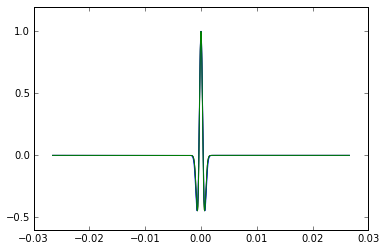

In [19]:
#wavlet

A = 1.000000
f = 600 #30.000 # 133
ff = str(f) + " - Hz"
j = 400

wav = []
for i in range (len(TT)):
    a = f
    EE1 = -(np.pi**2)*(a**2)*(TT[i]**2)
    wav01 = A*(1 - (2*(np.pi**2)) * (a**2) * (TT[i]**2))*np.exp(EE1) # 2497.55919007
    wav.append(wav01)
    
wavs = []
for i in range (len(TT)):
    EE1s = -(np.pi**2)*(a**2)*(TTs[i]**2)
    wav01s = A*(1 - (2*(np.pi**2)) * (a**2) * (TTs[i]**2))*np.exp(EE1s) # 2497.55919007
    wavs.append(wav01s)
    
wava = []
for i in range (len(TT)):
    EE1a = -(np.pi**2)*(a**2)*(TTa[i]**2)
    wav01a = A*(1 - (2*(np.pi**2)) * (a**2) * (TTa[i]**2))*np.exp(EE1a) # 2497.55919007
    wava.append(wav01a)
    
    
plt.plot(TT,wav,'-k')
plt.plot(TT,wavs,'-b')
plt.plot(TT,wava,'-g')
plt.show()

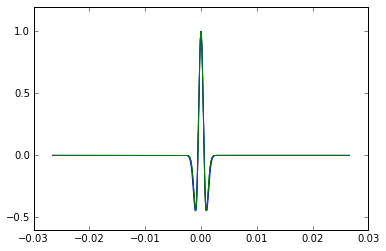

In [20]:
#wavlet

A1 = 1.000000
f1 = 410 #30.000 # 133
ff1 = str(f1) + " - Hz"
j1 = 400

wav1 = []
for i in range (len(TT)):
    a1 = f1
    EE2 = -(np.pi**2)*(a1**2)*(TT[i]**2)
    wav02 = (1 - (2*(np.pi**2)) * (a1**2) * (TT[i]**2))*np.exp(EE2) # 2497.55919007
    wav1.append(wav02)
    
wav1s = []
for i in range (len(TT)):
    EE2s = -(np.pi**2)*(a1**2)*(TTs[i]**2)
    wav02s = (1 - (2*(np.pi**2)) * (a1**2) * (TTs[i]**2))*np.exp(EE2s) # 2497.55919007
    wav1s.append(wav02s)
    
wav1a = []
for i in range (len(TT)):
    EE2a = -(np.pi**2)*(a1**2)*(TTa[i]**2)
    wav02a = (1 - (2*(np.pi**2)) * (a1**2) * (TTa[i]**2))*np.exp(EE2a) # 2497.55919007
    wav1a.append(wav02a)
    
    
plt.plot(TT,wav1,'-k')
plt.plot(TT,wav1s,'-b')
plt.plot(TT,wav1a,'-g')
plt.show()

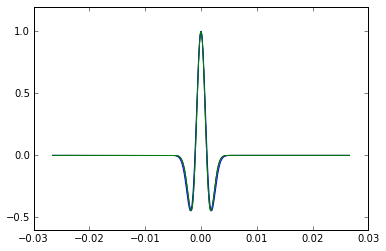

In [21]:
#wavlet

A2 = 1.000000
f2 = 220 #30.000 # 133
ff2 = str(f2) + " - Hz"
j2 = 400

wav2 = []
for i in range (len(TT)):
    a2 = f2
    EE3 = -(np.pi**2)*(a2**2)*(TT[i]**2)
    wav03 = (1 - (2*(np.pi**2)) * (a2**2) * (TT[i]**2))*np.exp(EE3) # 2497.55919007
    wav2.append(wav03)
    
wav2s = []
for i in range (len(TT)):
    EE3s = -(np.pi**2)*(a2**2)*(TTs[i]**2)
    wav03s = (1 - (2*(np.pi**2)) * (a2**2) * (TTs[i]**2))*np.exp(EE3s) # 2497.55919007
    wav2s.append(wav03s)
    
wav2a = []
for i in range (len(TT)):
    EE3a = -(np.pi**2)*(a2**2)*(TTa[i]**2)
    wav03a = (1 - (2*(np.pi**2)) * (a2**2) * (TTa[i]**2))*np.exp(EE3a) # 2497.55919007
    wav2a.append(wav03a)
    
    
plt.plot(TT,wav2,'-k')
plt.plot(TT,wav2s,'-b')
plt.plot(TT,wav2a,'-g')
plt.show()

30 - Hz


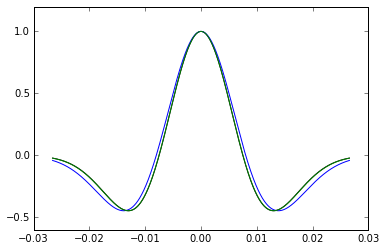

In [22]:
#wavlet

A3 = 1.000000
f3 = 30
ff3 = str(f3) + " - Hz" # transforma em string
j3 = 400
print ff3

wav3 = []
for i in range (len(TT)):
    a3 = A3*f3
    EE4 = -(np.pi**2)*(a3**2)*(TT[i]**2)
    wav04 = (1 - (2*(np.pi**2)) * (a3**2) * (TT[i]**2))*np.exp(EE4) # 2497.55919007
    wav3.append(wav04)
    
wav3s = []
for i in range (len(TT)):
    a3 = A3*f3
    EE4s = -(np.pi**2)*(a3**2)*(TTs[i]**2)
    wav04s = (1 - (2*(np.pi**2)) * (a3**2) * (TTs[i]**2))*np.exp(EE4s) # 2497.55919007
    wav3s.append(wav04s)
    
wav3a = []
for i in range (len(TT)):
    a3 = A3*f3
    EE4a = -(np.pi**2)*(a3**2)*(TTa[i]**2)
    wav04a = (1 - (2*(np.pi**2)) * (a3**2) * (TTa[i]**2))*np.exp(EE4a) # 2497.55919007
    wav3a.append(wav04a)
    
    
plt.plot(TT,wav3,'-k')
plt.plot(TT,wav3s,'-b')
plt.plot(TT,wav3a,'-g')
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Sinal -</font>

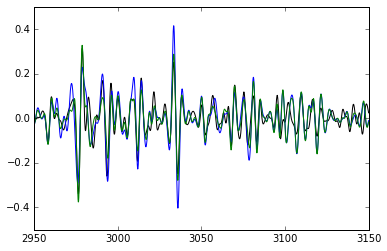

In [23]:
# Convolucao

signal  = np.convolve(R,wav,'same')  # wavlet convolucao Padrao
signals = np.convolve(Rs,wavs,'same') # wavlet convolucao Siqueira
signala = np.convolve(Ra,wava,'same') # wavlet convolucao Augusto

plt.plot(prof,signal,'-k')
plt.plot(prof,signals,'-b')
plt.plot(prof,signala,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

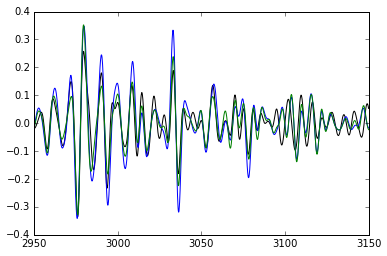

In [24]:
# Convolucao

signal1  = np.convolve(R,wav1,'same')  # wavlet convolucao Padrao
signal1s = np.convolve(Rs,wav1s,'same') # wavlet convolucao Siqueira
signal1a = np.convolve(Ra,wav1a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal1,'-k')
plt.plot(prof,signal1s,'-b')
plt.plot(prof,signal1a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

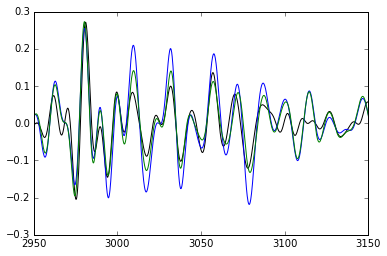

In [25]:
# Convolucao

signal2  = np.convolve(R,wav2,'same')  # wavlet convolucao Padrao
signal2s = np.convolve(Rs,wav2s,'same') # wavlet convolucao Siqueira
signal2a = np.convolve(Ra,wav2a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal2,'-k')
plt.plot(prof,signal2s,'-b')
plt.plot(prof,signal2a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

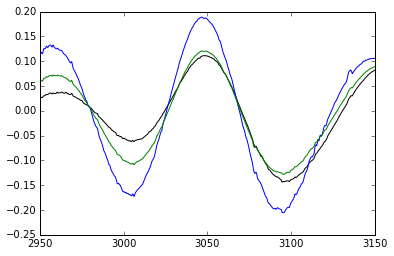

In [26]:
# Convolucao

signal3  = np.convolve(R,wav3,'same')  # wavlet convolucao Padrao
signal3s = np.convolve(Rs,wav3s,'same') # wavlet convolucao Siqueira
signal3a = np.convolve(Ra,wav3a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal3,'-k')
plt.plot(prof,signal3s,'-b')
plt.plot(prof,signal3a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Resultados -</font>

In [27]:
#------------------------diferenca velocidades--------------------------#

difVPVPa = [] # Diferenca absoluta VP - VPa
difVPVPs = [] # Diferenca absoluta VP - VPs

relVPVPa = [] # Diferenca relativa VP - VPa
relVPVPs = [] # Diferenca relativa VP - VPs

for i in range (p):
    difVPVPa.append(np.sqrt((VPa[i] - VP[i])**2))
    difVPVPs.append(np.sqrt((VPs[i] - VP[i])**2))
    
    relVPVPa.append(100.0*np.sqrt((((VP[i] - VPa[i])/VP[i]))**2))
    relVPVPs.append(100.0*np.sqrt((((VP[i] - VPs[i])/VP[i]))**2))

In [28]:
#---------------------------------Medidas-Estatisticas------------------------------------#
medVP = np.mean(VP) # media
maxVP = max    (VP) # maximo
minVP = min    (VP) # minimo
varVP = np.var (VP) # variancia
stdVP = np.std (VP) # desvio padrao
#----------------------------------------------#
print "-----------valores de VP-------------"
print medVP,"m/s   - media "
print maxVP,"m/s   - valor maximo"
print minVP,"m/s   - valor minimo"
print varVP,"m²/s² - variancia"
print stdVP,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPa = np.mean(VPa) # media
maxVPa = max    (VPa) # maximo
minVPa = min    (VPa) # minimo
varVPa = np.var (VPa) # variancia
stdVPa = np.std (VPa) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPa------------"
print medVPa,"m/s   - media "
print maxVPa,"m/s   - valor maximo"
print minVPa,"m/s   - valor minimo"
print varVPa,"m²/s² - variancia"
print stdVPa,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPs = np.mean(VPs) # media
maxVPs = max    (VPs) # maximo
minVPs = min    (VPs) # minimo
varVPs = np.var (VPs) # variancia
stdVPs = np.std (VPs) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPs------------"
print medVPs,"m/s   - media "
print maxVPs,"m/s   - valor maximo"
print minVPs,"m/s   - valor minimo"
print varVPs,"m²/s² - variancia"
print stdVPs,"m/s   - desvio padrao"
print "-------------------------------------"
print
print "------------Erro Absoluto------------"
medeaVPVPa = np.mean(difVPVPa) # media
maxeaVPVPa = max    (difVPVPa) # maximo
mineaVPVPa = min    (difVPVPa) # minimo
vareaVPVPa = np.var (difVPVPa) # variancia
stdeaVPVPa = np.std (difVPVPa) # desvio padrao
#----------------------------------------------#
print "---------valores de eaVPVPa----------"
print medeaVPVPa,"m/s   - media "
print maxeaVPVPa,"m/s   - valor maximo"
print mineaVPVPa,"m/s   - valor minimo"
print vareaVPVPa,"m²/s² - variancia"
print stdeaVPVPa,"m/s   - desvio padrao"
print "-------------------------------------"
medeaVPVPs = np.mean(difVPVPs) # media
maxeaVPVPs = max    (difVPVPs) # maximo
mineaVPVPs = min    (difVPVPs) # minimo
vareaVPVPs = np.var (difVPVPs) # variancia
stdeaVPVPs = np.std (difVPVPs) # desvio padrao
#----------------------------------------------#
print "---------valores de eaVPVPs----------"
print medeaVPVPs,"m/s   - media "
print maxeaVPVPs,"m/s   - valor maximo"
print mineaVPVPs,"m/s   - valor minimo"
print vareaVPVPs,"m²/s² - variancia"
print stdeaVPVPs,"m/s   - desvio padrao"
print "-------------------------------------"
print
print "------------Erro relativo------------"
mederVPVPa = np.mean(relVPVPa) # media
maxerVPVPa = max    (relVPVPa) # maximo
minerVPVPa = min    (relVPVPa) # minimo
varerVPVPa = np.var (relVPVPa) # variancia
stderVPVPa = np.std (relVPVPa) # desvio padrao
#----------------------------------------------#
print "---------valores de erVPVPa----------"
print mederVPVPa,"m/s   - media "
print maxerVPVPa,"m/s   - valor maximo"
print minerVPVPa,"m/s   - valor minimo"
print varerVPVPa,"m²/s² - variancia"
print stderVPVPa,"m/s   - desvio padrao"
print "-------------------------------------"
mederVPVPs = np.mean(relVPVPs) # media
maxerVPVPs = max    (relVPVPs) # maximo
minerVPVPs = min    (relVPVPs) # minimo
varerVPVPs = np.var (relVPVPs) # variancia
stderVPVPs = np.std (relVPVPs) # desvio padrao
#----------------------------------------------#
print "---------valores de erVPVPs----------"
print mederVPVPs,"m/s   - media "
print maxerVPVPs,"m/s   - valor maximo"
print minerVPVPs,"m/s   - valor minimo"
print varerVPVPs,"m²/s² - variancia"
print stderVPVPs,"m/s   - desvio padrao"
print "-------------------------------------"

print'\\begin{table}[]'
print'\centering'
print'\caption{Medidas Estat}'
print'\label{my-label}'
print'\\begin{tabular}{|l|l|l|}'
print'\hline'
print'&  &  \\\ \hline'
print'Valores de $V_P$ &  &  \\\ \hline'
print'&  &  \\\ \hline'
print'\end{tabular}'
print'\end{table}'


-----------valores de VP-------------
3825.98370346 m/s   - media 
5461.06185568 m/s   - valor maximo
2754.5755982 m/s   - valor minimo
274603.137334 m²/s² - variancia
524.025893763 m/s   - desvio padrao
-------------------------------------
-----------valores de VPa------------
3821.08534239 m/s   - media 
6034.86311415 m/s   - valor maximo
2660.36645071 m/s   - valor minimo
205898.074627 m²/s² - variancia
453.75993061 m/s   - desvio padrao
-------------------------------------
-----------valores de VPs------------
4121.63512012 m/s   - media 
5584.69103267 m/s   - valor maximo
2776.66655801 m/s   - valor minimo
409236.209505 m²/s² - variancia
639.715725542 m/s   - desvio padrao
-------------------------------------

------------Erro Absoluto------------
---------valores de eaVPVPa----------
200.283402979 m/s   - media 
1175.04009684 m/s   - valor maximo
0.172626366242 m/s   - valor minimo
31771.3439721 m²/s² - variancia
178.24517938 m/s   - desvio padrao
-----------------------------

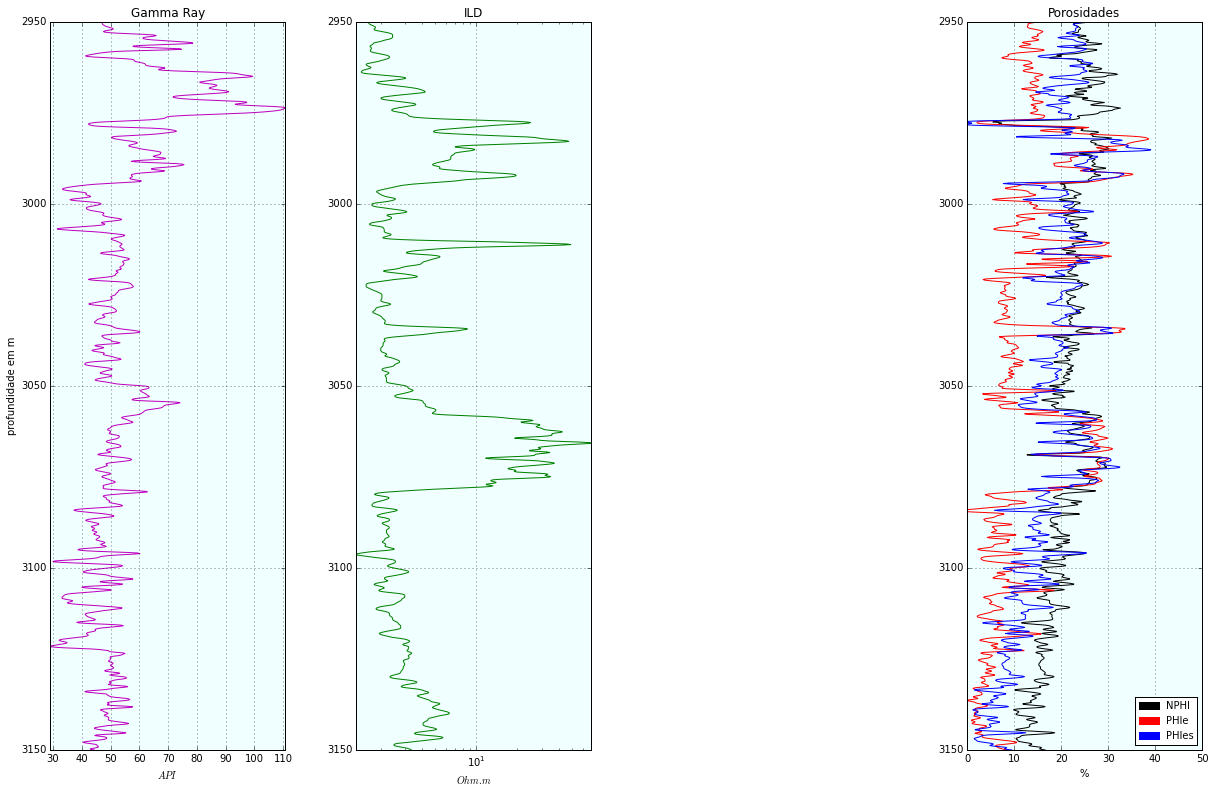

In [29]:
fig = plt.figure(figsize= (20,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')   

ax2.plot(GR,prof,'-m',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('Gamma Ray')                             # aqui o titulo 
ax2.set_xlabel('$API$')                     # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')              # aqui o que representa o eixo y

#                         # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(GR),xmin=min(GR))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#-------------------------------------------------------------------------------------------------#

ax2 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')   

ax2.semilogx(ILD,prof,'-g',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('ILD')                             # aqui o titulo 
ax2.set_xlabel('$Ohm.m$')                     

plt.xlim(xmax=max(ILD),xmin=min(ILD))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#----------------------------------------------------------------------------------------------------#
ax2 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')   

ax2.plot(PHIN,prof,'-k',linewidth = 1)
ax2.plot(PHIe,prof,'-r',linewidth = 1)
#ax2.plot(PHItd,prof,'-m',linewidth = 1)
ax2.plot(PHIes,prof,'-b',linewidth = 1)
#ax2.plot(PHIts,prof,'-c',linewidth = 1)

ax2label1 = mpatches.Patch(label='NPHI',color='k')
ax2label2 = mpatches.Patch(label='PHIe',color='r')
ax2label3 = mpatches.Patch(label='PHIes',color='b')

ax2.set_title('Porosidades') 
ax2.set_xlabel('%')                     

plt.legend(handles=[ax2label1, ax2label2, ax2label3],loc=4,fontsize=10) # fontsize = tamanho da fonte
plt.xlim(xmax=50,xmin=0.0)     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

plt.show()

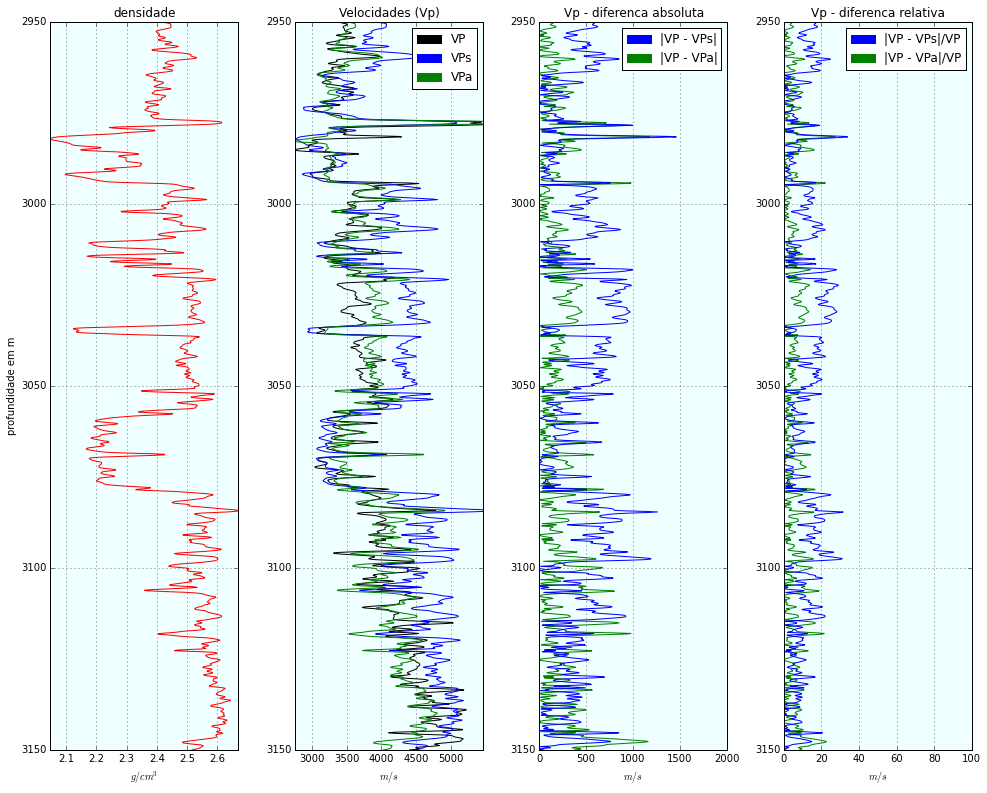

In [30]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')

ax8.plot(RHOb,prof,'-',linewidth = 1,color='r')


ax8.set_title('densidade')
ax8.set_xlabel('$g/cm^3$')
ax8.set_ylabel('profundidade em m')

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax7 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')


ax7.plot(VP,prof,'-k',linewidth = 1)  #
ax7.plot(VPs,prof,'-b',linewidth = 1) #
ax7.plot(VPa,prof,'-g',linewidth = 1) #VRMS
ax7.set_title('Velocidades (Vp)')
ax7.set_xlabel('$m/s$')

ax7label1 = mpatches.Patch(label='VP' ,color='k')
ax7label2 = mpatches.Patch(label='VPs',color='b')
ax7label3 = mpatches.Patch(label='VPa',color='g')

plt.legend(handles=[ax7label1, ax7label2, ax7label3],loc=1)
plt.xlim(xmax=max(VP),xmin=min(VP))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(4,4,3, axisbg='#F0FFFF')

ax6.plot(difVPVPa,prof,'-g',linewidth = 1) # augusto
ax6.plot(difVPVPs,prof,'-b',linewidth = 1) # siqueira
ax6.set_title('Vp - diferenca absoluta')
ax6.set_xlabel('$m/s$')

ax6label1 = mpatches.Patch(label='|VP - VPs|' ,color='b')
ax6label2 = mpatches.Patch(label='|VP - VPa|',color='g')

plt.legend(handles=[ax6label1, ax6label2],loc=1)
#plt.xlim(xmax=max(difVPVPs),xmin=min(difVPVPs))
plt.xlim(xmax=2000,xmin=0)
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')

ax6.plot(relVPVPa,prof,'-g',linewidth = 1) # augusto
ax6.plot(relVPVPs,prof,'-b',linewidth = 1) # siqueira
ax6.set_title('Vp - diferenca relativa')
ax6.set_xlabel('$m/s$')

ax6label1 = mpatches.Patch(label='|VP - VPs|/VP' ,color='b')
ax6label2 = mpatches.Patch(label='|VP - VPa|/VP',color='g')

plt.legend(handles=[ax6label1, ax6label2],loc=1)
#plt.xlim(xmax=max(difVPVPs),xmin=min(difVPVPs))
plt.xlim(xmax=100,xmin=0)
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()



plt.show()

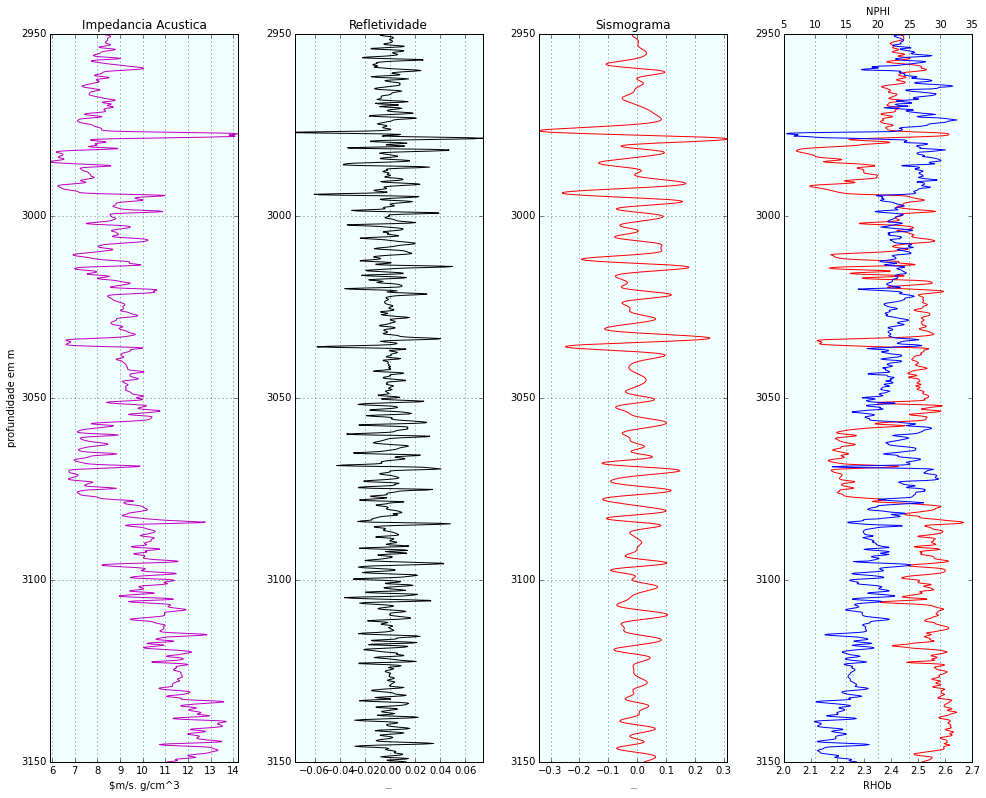

In [31]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')

ax8.plot(z_imp,prof,linewidth = 1,color='m')


ax8.set_title('Impedancia Acustica')
ax8.set_xlabel('$m/s. g/cm^3')
ax8.set_ylabel('profundidade em m')

plt.xlim(xmax=max(z_imp),xmin=min(z_imp))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax7 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')


ax7.plot(R,prof,'-k',linewidth = 1)  #
ax7.set_title('Refletividade')
ax7.set_xlabel('$-$')

plt.xlim(xmax=max(R),xmin=min(R))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(4,4,3, axisbg='#F0FFFF')

ax6.plot(signal,prof,'-r',linewidth = 1) # augusto
ax6.set_title('Sismograma')
ax6.set_xlabel('$-$')

#plt.xlim(xmax=max(difVPVPs),xmin=min(difVPVPs))
plt.xlim(xmax=max(signal),xmin=min(signal))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax23 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')

ax23.plot(RHOb,prof,'-r',linewidth = 1)
#ax23.xlim(xmax=2.95,xmin=1.95)
ax23.set_xlabel('RHOb')

ax24 = ax23.twiny()

ax24.plot(PHIN,prof,'-b',linewidth = 1)
ax24.set_xlabel('NPHI')

plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

plt.show()

In [32]:
vals = 300

DD = [signal]*vals
DD = np.array(DD)
DD = np.transpose(DD)

DD1 = [signal1]*vals
DD1 = np.array(DD1)
DD1 = np.transpose(DD1)

DD2 = [signal2]*vals
DD2 = np.array(DD2)
DD2 = np.transpose(DD2)

DD3 = [signal3]*vals
DD3 = np.array(DD3)
DD3 = np.transpose(DD3)

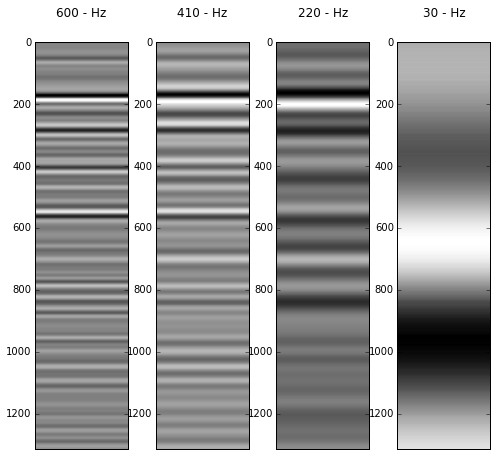

In [33]:
#------------------------------------------#

fig = plt.figure(figsize= (10,200))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax1 = fig.add_subplot(5,5,1, axisbg='#F0FFFF')
ax1.matshow(DD,cmap=cm.gray)

ax1.set_title(ff)

ax1.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax2 = fig.add_subplot(5,5,2, axisbg='#F0FFFF')
ax2.matshow(DD1,cmap=cm.gray)

ax2.set_title(ff1)

ax2.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax3 = fig.add_subplot(5,5,3, axisbg='#F0FFFF')
ax3.matshow(DD2,cmap=cm.gray)

ax3.set_title(ff2)

ax3.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax4 = fig.add_subplot(5,5,4, axisbg='#F0FFFF')
ax4.matshow(DD3,cmap=cm.gray)

ax4.set_title(ff3)

ax4.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Banco de Dados - Exportando Valores -</font>

In [34]:
X = [353885]*p
Y = [7516462]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTP    # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8] = z_imp  # Impedancia acustica
filef[:,9] = R      # Refletividade
filef[:,10] = signal # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp  # Impedancia acustica
filef[:,12]= R      # Refletividade
filef[:,13]= signal # Sismograma sintetico

np.savetxt('RJS0019_mario.dat', filef, delimiter=' ', fmt='%.4f')